* Представление - tf-idf
* Данные обрезаны
* Баланс данных гораздо лучше

Алгоритмы:
* MultinomialNB
* ComplementNB
* LogisticRegression
* SVM
* Random Forest


# Импорт библиотек

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import sklearn

# Подготовка данных к обучению

## Предобработка new

In [39]:
# загрузка
df_new = pd.read_csv('r_dataisbeautiful_posts.csv')

# отображение
df_new.head()

D:\conda\lib\site-packages\IPython\core\interactiveshell.py:3063: DtypeWarning: Columns (5,7) have mixed types.Specify dtype option on import or set low_memory=False.
  interactivity=interactivity, compiler=compiler, result=result)


,id,title,score,author,author_flair_text,removed_by,total_awards_received,awarders,created_utc,full_link,num_comments,over_18
0,hbyv2e,[OC] How Bar Chart Race Animation Can be Creat...,1,Tom10AE,NaN,NaN,0.0,[],1592565317,https://www.reddit.com/r/dataisbeautiful/comme...,0,False
1,hbynoy,[UK] Labour and Conservative vote share by age...,1,Ge0rgeBr0ughton,NaN,NaN,0.0,[],1592564316,https://www.reddit.com/r/dataisbeautiful/comme...,1,False
2,hbym2y,[NOC] Number of wallets returned across the wo...,1,i_am_shattered,NaN,NaN,0.0,[],1592564089,https://www.reddit.com/r/dataisbeautiful/comme...,1,False
3,hbyirw,Largest Banana Producing Countries (1961-2020)...,1,Bilal078692,NaN,moderator,0.0,[],1592563628,https://www.reddit.com/r/dataisbeautiful/comme...,0,False
4,hby1fy,[OC] Popular Combinations for the StamiStudios...,1,shahinrostami,Viz Researcher,NaN,0.0,[],1592561119,https://www.reddit.com/r/dataisbeautiful/comme...,2,False


In [40]:
# очистка от всех признаков кроме title

df_new = df_new.drop(['id', 'score','author','author_flair_text','removed_by','total_awards_received',
             'awarders','created_utc','full_link','num_comments'], axis = 1)
df_new.head()

,title,over_18
0,[OC] How Bar Chart Race Animation Can be Creat...,False
1,[UK] Labour and Conservative vote share by age...,False
2,[NOC] Number of wallets returned across the wo...,False
3,Largest Banana Producing Countries (1961-2020)...,False
4,[OC] Popular Combinations for the StamiStudios...,False


In [41]:
# кол-во записей

len(df_new)

183891

In [42]:
# очистка от null значений

df_new = df_new.dropna()

df_new.head()

,title,over_18
0,[OC] How Bar Chart Race Animation Can be Creat...,False
1,[UK] Labour and Conservative vote share by age...,False
2,[NOC] Number of wallets returned across the wo...,False
3,Largest Banana Producing Countries (1961-2020)...,False
4,[OC] Popular Combinations for the StamiStudios...,False


In [43]:
# кол-во записей после очистки

len(df_new)

183890

## Обрежем данные

In [44]:
# выдлеим 1 метки

df_true = df_new[df_new['over_18'] == True]
df_true.head()

,title,over_18
41,Real Chimken Hours - A visualization of a nuke...,True
75,[OC] I sent reddit chat messages to promote a ...,True
107,"According To Pornhub, The South Watches More G...",True
606,[SELLING] having fun selling my nudes vids and...,True
975,12 vowel phonemes and their multiple English s...,True


In [45]:
# удалим 1 метки

df_new = df_new.drop(np.where(df_new['over_18'] == True)[0])

In [46]:
# обрежем данные

df_new = df_new[:5000]

In [47]:
len(df_new)

5000

In [48]:
# объединим

df_new = df_new.append(df_true , ignore_index=True)

In [49]:
len(df_new)

5943

In [50]:
# перемешаем

df_new = df_new.sample(frac=1).reset_index(drop=True)

df_new.head()

,title,over_18
0,Top 500 subreddits : mod networks,False
1,Understanding and Visualizing Covid Growth in ...,False
2,Countries with the Highest Prison Rates (1995-...,False
3,Top Movies -Worldwide Lifetime Gross,False
4,5 UPCOMING TECHNOLOGIES THAT MAY CHANGE THE WO...,False


In [51]:
df_new.groupby('over_18')['over_18'].count()

over_18
False    5000
True      943
Name: over_18, dtype: int64

## Ещё раз посмотрим на балансировку

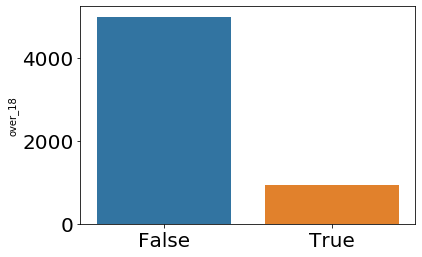

In [52]:
balance = df_new.groupby('over_18')['over_18'].count()

sns.barplot(x = [False, True], y = balance)

Баланс стал лучше за счёт обрезки и сохранения 1 метки

## Представим title через tfidf

In [53]:
title_new = df_new['title'].copy()
title_new

0                       Top 500 subreddits : mod networks
1       Understanding and Visualizing Covid Growth in ...
2       Countries with the Highest Prison Rates (1995-...
3                    Top Movies -Worldwide Lifetime Gross
4       5 UPCOMING TECHNOLOGIES THAT MAY CHANGE THE WO...
                              ...                        
5938                                          How telling
5939    How COVID-19 Has Impacted Media Consumption, b...
5940    Data for the cursing/swearing on every blink-1...
5941    [OC] 1 month of active tindering for a 24M ave...
5942       A Brief History of British and Irish Languages
Name: title, Length: 5943, dtype: object

In [54]:
# импортируем tfidf преобразование
from sklearn.feature_extraction.text import TfidfVectorizer

# стоп слова
from sklearn.feature_extraction.stop_words import ENGLISH_STOP_WORDS

# инициализировали алгоритм
vectorizer = TfidfVectorizer(stop_words=ENGLISH_STOP_WORDS, ngram_range=(1, 2))

# преобразовали в матрицу tfidf 
title_tfidf = vectorizer.fit_transform(title_new.values)

# отобразим значения 

title_tfidf[0]

<1x33714 sparse matrix of type '<class 'numpy.float64'>'
	with 7 stored elements in Compressed Sparse Row format>

## Выделим целевую переменную

In [55]:
y = np.array([1 if i == True else 0 for i in df_new['over_18']]) # ответы
y

array([0, 0, 0, ..., 1, 1, 0])

## Сделаем train-test split

In [56]:
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(title_tfidf,
                                                   y,
                                                   test_size=0.2,
                                                   random_state=42)

# Обучение алгоритмов

Как правило, лучше всего с тектсовыми данными из классических алгоритмов справляется Наивный Баес и его модификации. Начнём с него.

Для тюнинга алгоритмов используем кросс-валидацию на тобучающей выборке

In [57]:
# Функция отрисовки графиков
def grid_plot(x, y, x_label, title, y_label='f1'):
    # определили размер графика
    plt.figure(figsize=(12, 6))
    # добавили сетку на фон
    plt.grid(True)
    # построили по х - число соседей, по y - точность
    plt.plot(x, y, 'go-')
    # добавили подписи осей и название графика
    plt.xlabel(x_label)
    plt.ylabel(y_label)
    plt.title(title)

## Naive Bayes classifiers

### Multinomial Naive Bayes

In [58]:
from sklearn.naive_bayes import MultinomialNB

from sklearn.model_selection import GridSearchCV

alg = MultinomialNB()

grid = {'alpha': np.array(np.linspace(0, 6, 30), dtype='float'),
        }

gs = GridSearchCV(alg, grid, verbose=2, n_jobs = -1,scoring='f1')
gs.fit(X_train, y_train)
gs.best_params_, gs.best_score_

Fitting 5 folds for each of 30 candidates, totalling 150 fits


[Parallel(n_jobs=-1)]: Using backend LokyBackend with 8 concurrent workers.
[Parallel(n_jobs=-1)]: Done  25 tasks      | elapsed:    1.0s
[Parallel(n_jobs=-1)]: Done 150 out of 150 | elapsed:    1.3s finished


({'alpha': 0.20689655172413793}, 0.7200341417280836)

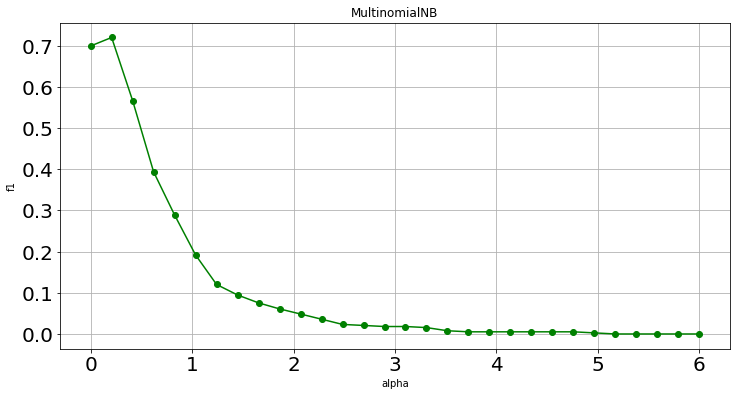

In [59]:
grid_plot(grid['alpha'], gs.cv_results_['mean_test_score'], 'alpha', 'MultinomialNB')

In [60]:
from sklearn.metrics import classification_report

clf = MultinomialNB(0)
clf.fit(X_train, y_train)

preds = clf.predict(X_test)

print(classification_report(y_test, preds))

              precision    recall  f1-score   support

           0       0.94      0.94      0.94      1008
           1       0.65      0.66      0.65       181

    accuracy                           0.89      1189
   macro avg       0.79      0.80      0.80      1189
weighted avg       0.89      0.89      0.89      1189



D:\conda\lib\site-packages\sklearn\naive_bayes.py:507: UserWarning: alpha too small will result in numeric errors, setting alpha = 1.0e-10
  'setting alpha = %.1e' % _ALPHA_MIN)


[[944  64]
 [ 62 119]]


Text(0.5, 42.0, 'Predicted value')

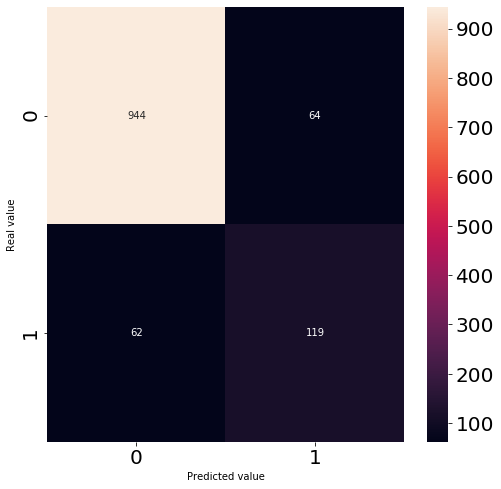

In [61]:
# confusion matrix
from sklearn.metrics import confusion_matrix
import matplotlib

fig = plt.figure(figsize=(8,8))
nn_mtx = confusion_matrix(y_test, preds)
print(nn_mtx)
font = {'weight' : 'bold', 'size'   :22}
matplotlib.rc('xtick', labelsize=20) 
matplotlib.rc('ytick', labelsize=20) 
sns.heatmap(nn_mtx, annot=True, fmt="d")
plt.ylabel("Real value")
plt.xlabel("Predicted value")

Метрики стали гораздо лучше за счёт небольшой, но балансировки данных

### Complement Naive Bayes

In [62]:
from sklearn.naive_bayes import ComplementNB

alg = ComplementNB()

grid = {'alpha': np.array(np.linspace(0, 6, 30), dtype='float'),
        }

gs = GridSearchCV(alg, grid, verbose=2, n_jobs = -1,scoring='f1')
gs.fit(X_train, y_train)
gs.best_params_, gs.best_score_

Fitting 5 folds for each of 30 candidates, totalling 150 fits


[Parallel(n_jobs=-1)]: Using backend LokyBackend with 8 concurrent workers.
[Parallel(n_jobs=-1)]: Done  34 tasks      | elapsed:    0.1s
[Parallel(n_jobs=-1)]: Done 150 out of 150 | elapsed:    0.3s finished


({'alpha': 1.6551724137931034}, 0.7003381757561324)

In [63]:
clf = ComplementNB(0)
clf.fit(X_train, y_train)

preds = clf.predict(X_test)

print(classification_report(y_test, preds))

              precision    recall  f1-score   support

           0       0.94      0.92      0.93      1008
           1       0.61      0.69      0.65       181

    accuracy                           0.88      1189
   macro avg       0.77      0.81      0.79      1189
weighted avg       0.89      0.88      0.89      1189



D:\conda\lib\site-packages\sklearn\naive_bayes.py:507: UserWarning: alpha too small will result in numeric errors, setting alpha = 1.0e-10
  'setting alpha = %.1e' % _ALPHA_MIN)


[[927  81]
 [ 56 125]]


Text(0.5, 42.0, 'Predicted value')

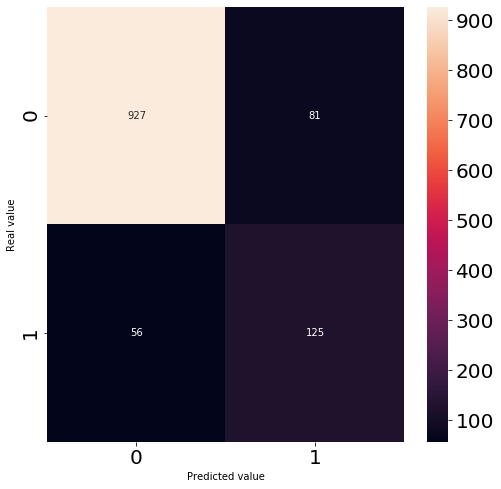

In [64]:
# confusion matrix
from sklearn.metrics import confusion_matrix
import matplotlib

fig = plt.figure(figsize=(8,8))
nn_mtx = confusion_matrix(y_test, preds)
print(nn_mtx)
font = {'weight' : 'bold', 'size'   :22}
matplotlib.rc('xtick', labelsize=20) 
matplotlib.rc('ytick', labelsize=20) 
sns.heatmap(nn_mtx, annot=True, fmt="d")
plt.ylabel("Real value")
plt.xlabel("Predicted value")

## Logistic Regression

In [65]:
from sklearn.linear_model import LogisticRegression

alg = LogisticRegression(class_weight='balanced')

grid = {'penalty': ['l1', 'l2', 'elasticnet'],
        'C': np.array(np.logspace(-3, 2, num = 10), dtype='float'),
        }

gs = GridSearchCV(alg, grid, verbose=2, n_jobs = -1,scoring='f1')
gs.fit(X_train, y_train)

print(gs.best_params_, gs.best_score_)

Fitting 5 folds for each of 30 candidates, totalling 150 fits


[Parallel(n_jobs=-1)]: Using backend LokyBackend with 8 concurrent workers.
[Parallel(n_jobs=-1)]: Done  34 tasks      | elapsed:    0.1s


{'C': 2.1544346900318843, 'penalty': 'l2'} 0.7384116159296152


[Parallel(n_jobs=-1)]: Done 150 out of 150 | elapsed:    3.3s finished


In [69]:
clf = LogisticRegression(C= 2.1544346900318843,penalty='l2', class_weight='balanced')
clf.fit(X_train, y_train)

preds = clf.predict(X_test)

print(classification_report(y_test, preds))

              precision    recall  f1-score   support

           0       0.94      0.99      0.96      1008
           1       0.90      0.63      0.74       181

    accuracy                           0.93      1189
   macro avg       0.92      0.81      0.85      1189
weighted avg       0.93      0.93      0.93      1189



[[992  16]
 [ 69 112]]


Text(0.5, 42.0, 'Predicted value')

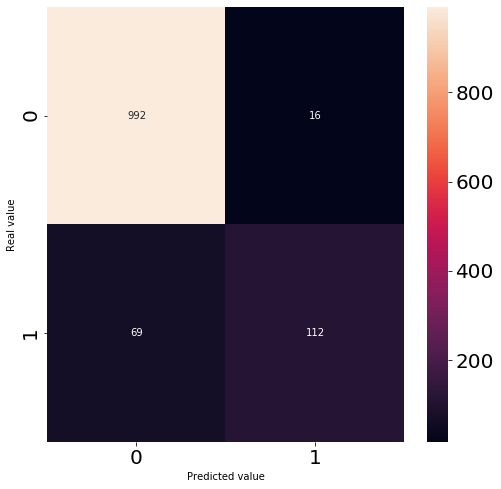

In [67]:
# confusion matrix
from sklearn.metrics import confusion_matrix
import matplotlib

fig = plt.figure(figsize=(8,8))
nn_mtx = confusion_matrix(y_test, preds)
print(nn_mtx)
font = {'weight' : 'bold', 'size'   :22}
matplotlib.rc('xtick', labelsize=20) 
matplotlib.rc('ytick', labelsize=20) 
sns.heatmap(nn_mtx, annot=True, fmt="d")
plt.ylabel("Real value")
plt.xlabel("Predicted value")

In [68]:
from sklearn.linear_model import LogisticRegression

alg = LogisticRegression()

grid = {'penalty': ['l1', 'l2', 'elasticnet'],
        'C': np.array(np.logspace(-3, 2, num = 10), dtype='float'),
        }

gs = GridSearchCV(alg, grid, verbose=2, n_jobs = -1,scoring='f1')
gs.fit(X_train, y_train)

print(gs.best_params_, gs.best_score_)

Fitting 5 folds for each of 30 candidates, totalling 150 fits


[Parallel(n_jobs=-1)]: Using backend LokyBackend with 8 concurrent workers.
[Parallel(n_jobs=-1)]: Done  34 tasks      | elapsed:    0.1s
[Parallel(n_jobs=-1)]: Done 135 out of 150 | elapsed:    3.4s remaining:    0.3s
[Parallel(n_jobs=-1)]: Done 150 out of 150 | elapsed:    4.1s finished


{'C': 100.0, 'penalty': 'l2'} 0.6654050934462805


D:\conda\lib\site-packages\sklearn\linear_model\_logistic.py:940: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  extra_warning_msg=_LOGISTIC_SOLVER_CONVERGENCE_MSG)


In [70]:
clf = LogisticRegression(C=100,penalty='l2')
clf.fit(X_train, y_train)

preds = clf.predict(X_test)

print(classification_report(y_test, preds))

              precision    recall  f1-score   support

           0       0.93      0.99      0.96      1008
           1       0.94      0.56      0.70       181

    accuracy                           0.93      1189
   macro avg       0.93      0.78      0.83      1189
weighted avg       0.93      0.93      0.92      1189



D:\conda\lib\site-packages\sklearn\linear_model\_logistic.py:940: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  extra_warning_msg=_LOGISTIC_SOLVER_CONVERGENCE_MSG)


[[1001    7]
 [  79  102]]


Text(0.5, 42.0, 'Predicted value')

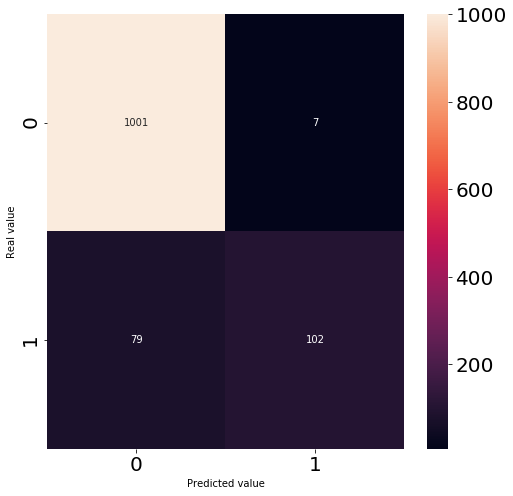

In [71]:
# confusion matrix
from sklearn.metrics import confusion_matrix
import matplotlib

fig = plt.figure(figsize=(8,8))
nn_mtx = confusion_matrix(y_test, preds)
print(nn_mtx)
font = {'weight' : 'bold', 'size'   :22}
matplotlib.rc('xtick', labelsize=20) 
matplotlib.rc('ytick', labelsize=20) 
sns.heatmap(nn_mtx, annot=True, fmt="d")
plt.ylabel("Real value")
plt.xlabel("Predicted value")

Опять метрики гораздо лучше, сам лог рег сработал лучше, чем Навный Байес, если указвать веса, то всё вообще приемлимо.

## SVM

In [73]:
from sklearn.svm import SVC

alg = SVC(class_weight='balanced')

grid = {'C': np.array(np.linspace(-5, 5, 10), dtype='float'),
        'kernel': ['linear', 'poly', 'rbf', 'sigmoid'],
        }

gs = GridSearchCV(alg, grid, verbose=2, n_jobs = -1, scoring='f1')
gs.fit(X_train, y_train)
gs.best_params_, gs.best_score_

Fitting 5 folds for each of 40 candidates, totalling 200 fits


[Parallel(n_jobs=-1)]: Using backend LokyBackend with 8 concurrent workers.
[Parallel(n_jobs=-1)]: Done  34 tasks      | elapsed:    0.1s
[Parallel(n_jobs=-1)]: Done 185 out of 200 | elapsed:   33.2s remaining:    2.6s
[Parallel(n_jobs=-1)]: Done 200 out of 200 | elapsed:   35.9s finished


({'C': 0.5555555555555554, 'kernel': 'sigmoid'}, 0.7512895952455008)

In [74]:
clf = SVC(C=0.5555555555555554, kernel='sigmoid',class_weight='balanced')
clf.fit(X_train, y_train)

preds = clf.predict(X_test)

print(classification_report(y_test, preds))

              precision    recall  f1-score   support

           0       0.94      0.98      0.96      1008
           1       0.87      0.66      0.75       181

    accuracy                           0.93      1189
   macro avg       0.90      0.82      0.85      1189
weighted avg       0.93      0.93      0.93      1189



[[990  18]
 [ 62 119]]


Text(0.5, 42.0, 'Predicted value')

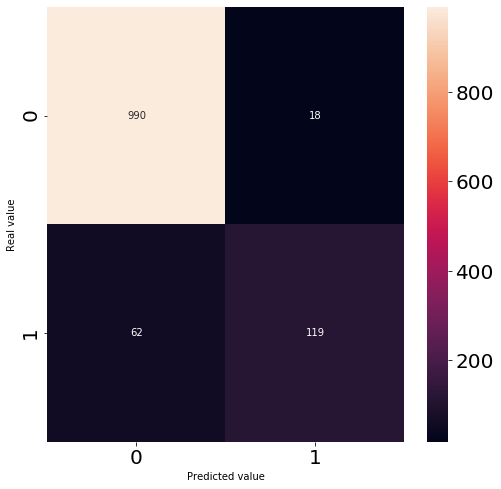

In [76]:
# confusion matrix
from sklearn.metrics import confusion_matrix
import matplotlib

fig = plt.figure(figsize=(8,8))
nn_mtx = confusion_matrix(y_test, preds)
print(nn_mtx)
font = {'weight' : 'bold', 'size'   :22}
matplotlib.rc('xtick', labelsize=20) 
matplotlib.rc('ytick', labelsize=20) 
sns.heatmap(nn_mtx, annot=True, fmt="d")
plt.ylabel("Real value")
plt.xlabel("Predicted value")

SVM сработал ещё лучше

## Random Forest

In [78]:
from sklearn.ensemble import RandomForestClassifier

alg = RandomForestClassifier(class_weight='balanced')

grid = {'criterion': ['gini', 'entropy']
        }

gs = GridSearchCV(alg, grid, verbose=2, n_jobs = -1,scoring='f1')
gs.fit(X_train, y_train)
gs.best_params_, gs.best_score_

Fitting 5 folds for each of 2 candidates, totalling 10 fits


[Parallel(n_jobs=-1)]: Using backend LokyBackend with 8 concurrent workers.
[Parallel(n_jobs=-1)]: Done   7 out of  10 | elapsed:   20.3s remaining:    8.7s
[Parallel(n_jobs=-1)]: Done  10 out of  10 | elapsed:   31.2s finished


({'criterion': 'entropy'}, 0.656003558460349)

In [79]:
clf = RandomForestClassifier(class_weight='balanced', criterion='entropy')
clf.fit(X_train, y_train)

preds = clf.predict(X_test)

print(classification_report(y_test, preds))

              precision    recall  f1-score   support

           0       0.92      0.99      0.96      1008
           1       0.93      0.55      0.69       181

    accuracy                           0.93      1189
   macro avg       0.93      0.77      0.82      1189
weighted avg       0.93      0.93      0.92      1189



Random Forest работает хуже, переходим к последнему алгоритму

# Вывод по всей работе

Я попробовал tfidf и bag of words на всём датасете, так же попробовал обрезать данные, немного улучшить баланс и прогнать те же алгоритмы и ещё несколько

В целом, видно, что многое зависит от баланса данных, что классические алгоритмы на больших данных работают ооооочень долго (кроме наивного байеса), если обрезать данные, то всё намного лучше.

На всех данных лог рег показал результат лучше, чем байес

На обрезаных данных самы лучший резльтат получился у SVM